<a href="https://colab.research.google.com/github/ianxdxd/CalculusForML/blob/main/PerceptronFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a Perceptron with only NumPy to apply what I learned in Linear Algebra and Calculus.

This is the percepetron that will be built:

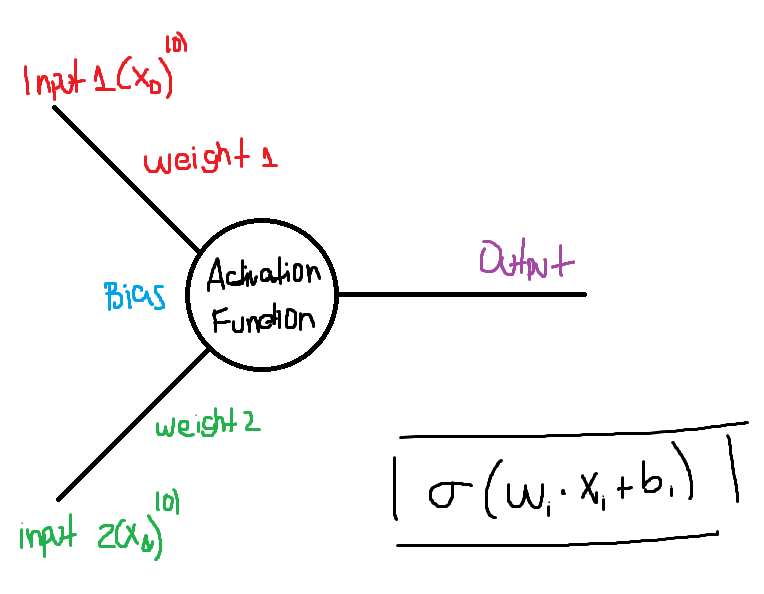

I used these sites for research on the implementation of a perceptron:
- https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
- https://medium.com/@ismailghallou/build-your-perceptron-neural-net-from-scratch-e12b7be9d1ef
- https://medium.com/@becaye-balde/perceptron-building-it-from-scratch-in-python-15716806ef64

##### Data

In [56]:
# 0 for Iris-setosa & 1 for Iris-versicolor
train_data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

##### Implementation:

In [3]:
import numpy as np

In [58]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1-sigmoid(x))

In [57]:
def perceptron(data, w, b, learning_rate=0.1, epochs=1000):

    data = np.array(data)  # Ensure data is a NumPy array
    predictions=[]

    for epoch in range(epochs):

        np.random.shuffle(data)

        for i in range(len(data)):
            X = data[i, :-1] # [i,:-1] create a tuple without the last element of the features
            y = data[i, -1] # target (either 0 or 1)

        Z = np.dot(X, w) + b
        prediction = sigmoid(Z)

        '''
        The square of the difference between the prediction and the actual value
        is a valid approach, but there are other ones like the binary cross-entr
        opy loss.
        '''

        # cost_prime = 2 * (prediction - y) # derivative of the cost function
        cost_prime = -(y - prediction) # binary cross-entropy loss
        dz_prediction = sigmoid_prime(Z) # prime prediction using the derivative of the sigmoid
        grad_cost = cost_prime * dz_prediction # gradient calculation

        # updating weights and bias
        w -= learning_rate * grad_cost * X
        b -= learning_rate * grad_cost

    return w, b

In [59]:
w = [np.random.randn(),np.random.randn()]
b = np.random.randn()
w_res, b_res = perceptron(train_data, w, b)
scores = []

for row in range(len(test_data)):
    data = np.array(test_data)
    np.random.shuffle(data)
    X = data[row, :-1]
    z = np.dot(X,w_res) + b_res
    prediction = sigmoid(z)
    target = (data[row][2])
    # print(target, round(prediction))
    if target == round(float(prediction)):
        scores.append(1)
    else:
        scores.append(0)

print(f"Accuracy: {sum(scores)/len(scores)}")
# Accuracy: 0.9433962264150944 square of the diff
# Accuracy: 0.9622641509433962 binary cross-entropy loss

Accuracy: 0.9433962264150944
[4.4 3.2]
